In [13]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk


     ---------------------------------------- 1.5/1.5 MB 5.9 MB/s eta 0:00:00
     ---------------------------------------- 96.6/96.6 kB ? eta 0:00:00
     ---------------------------------------- 78.4/78.4 kB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 263.0/263.0 kB ? eta 0:00:00


In [4]:
pip install WordCloud

     -------------------------------------- 153.1/153.1 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas 
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
from bs4 import BeautifulSoup
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import pandas as pd                     
import matplotlib.pyplot as plt          # plotting
import numpy as np                       # dense matrices
from scipy.sparse import csr_matrix      # sparse matrices
%matplotlib inline



sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [25]:
train = pd.read_csv('data\Train.csv')
test = pd.read_csv('data\Test.csv')

In [9]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install panda

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
     ------------------------------------ 160.2/160.2 kB 739.0 kB/s eta 0:00:00
     ---------------------------------------- 61.2/61.2 kB 3.4 MB/s eta 0:00:00
     ------------------------------------ 140.4/140.4 kB 834.2 kB/s eta 0:00:00
Using legacy 'setup.py install' for panda, since package 'wheel' is not installed.
  Running setup.py install for panda: started
  Running setup.py install for panda: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install sentiment

Note: you may need to restart the kernel to use updated packages.


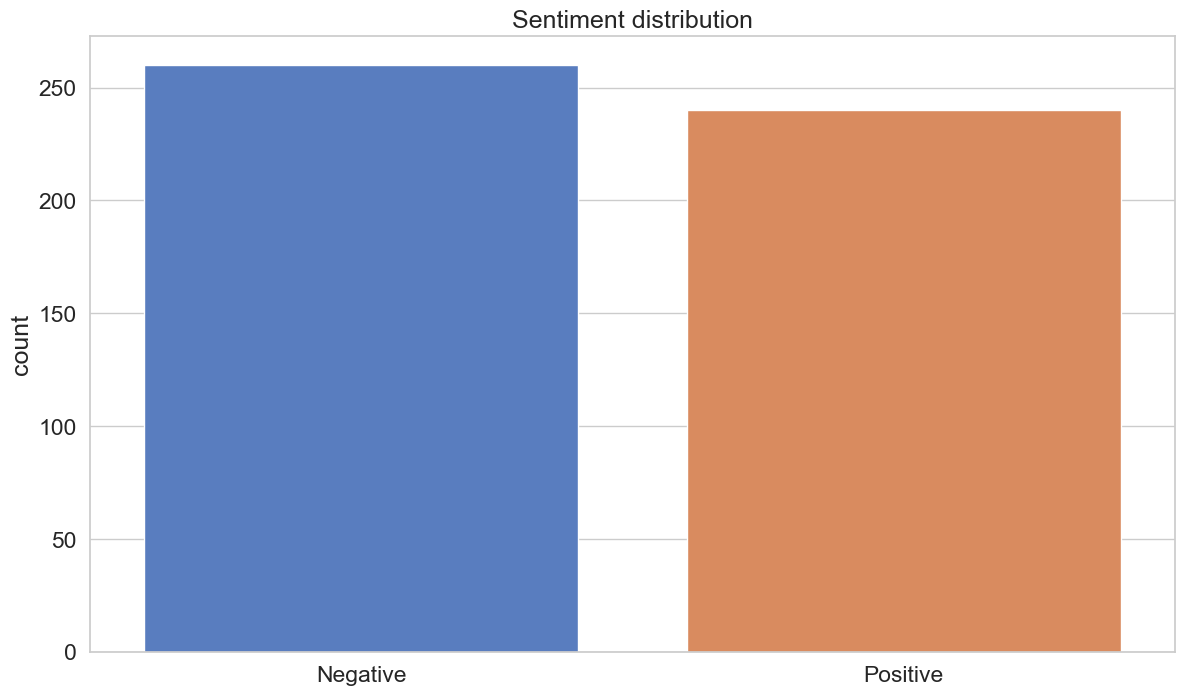

In [26]:
f = sns.countplot(x='sentiment', data=train)
f.set_title("Sentiment distribution")
f.set_xticklabels(['Negative', 'Positive'])
plt.xlabel("");

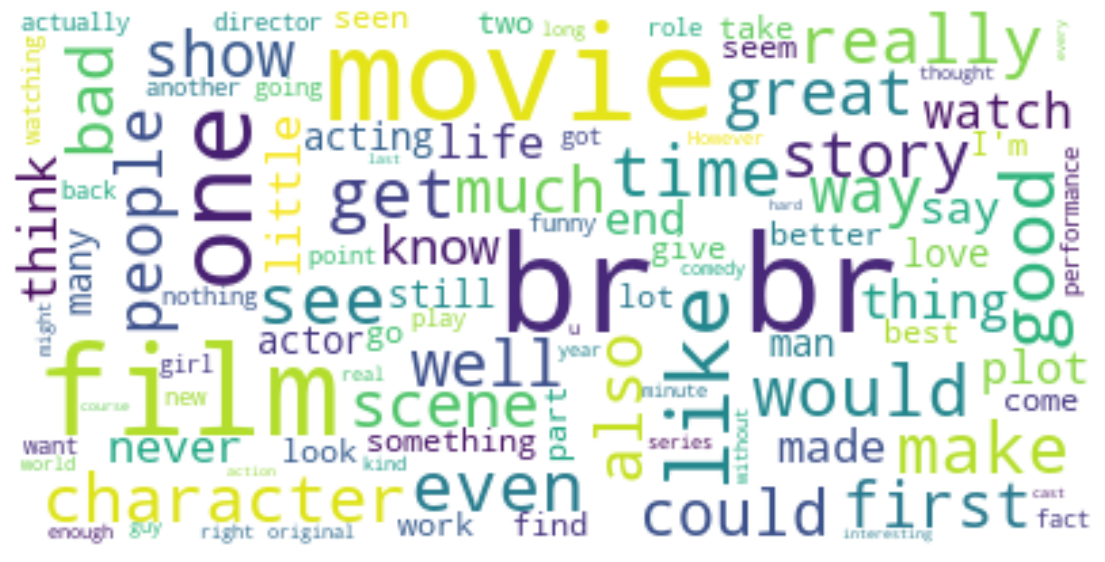

In [27]:
text = " ".join(review for review in train.review)


wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words("english")).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

In [9]:
class Tokenizer:
  
  def clean(self, text):
      no_html = BeautifulSoup(text).get_text()
      clean = re.sub("[^a-z\s]+", " ", no_html, flags=re.IGNORECASE)
      return re.sub("(\s+)", " ", clean)

 
  def tokenize(self, text):
      clean = self.clean(text).lower()
      stopwords_en = stopwords.words("english")
      return [w for w in re.split("\W+", clean) if not w in stopwords_en]

In [19]:
class MultinomialNaiveBayes:
  
    def __init__(self, classes, tokenizer):
      self.tokenizer = tokenizer
      self.classes = classes
      
    def group_by_class(self, X, y):
      data = dict()
      for c in self.classes:
        data[c] = X[np.where(y == c)]
      return data
           
    def fit(self, X, y):
        self.n_class_items = {}
        self.log_class_priors = {}
        self.word_counts = {}
        self.vocab = set()

        n = len(X)
        
        grouped_data = self.group_by_class(X, y)
        
        for c, data in grouped_data.items():
          self.n_class_items[c] = len(data)
          self.log_class_priors[c] = math.log(self.n_class_items[c] / n)
          self.word_counts[c] = defaultdict(lambda: 0)
          
          for text in data:
            counts = Counter(self.tokenizer.tokenize(text))
            for word, count in counts.items():
                if word not in self.vocab:
                    self.vocab.add(word)

                self.word_counts[c][word] += count
                
        return self
      
    def laplace_smoothing(self, word, text_class):
      num = self.word_counts[text_class][word] + 1
      denom = self.n_class_items[text_class] + len(self.vocab)
      return math.log(num / denom)
      
    def predict(self, X):
        result = []
        for text in X:
          
          class_scores = {c: self.log_class_priors[c] for c in self.classes}

          words = set(self.tokenizer.tokenize(text))
          for word in words:
              if word not in self.vocab: continue

              for c in self.classes:
                
                log_w_given_c = self.laplace_smoothing(word, c)
                class_scores[c] += log_w_given_c
                
          result.append(max(class_scores, key=class_scores.get))

        return result

In [11]:
pip install train

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for train: filename=train-0.0.5-py3-none-any.whl size=8490 sha256=4b73ae8bcd8db8bd093714eccb9512b4bec50b168d3230a8043e43e9136b9280
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\70\b9\f3\c3ff20f48c8602e236ed0f8d51817962f176c304ef0a3011ec
Successfully built train
Note: you may need to restart the kernel to use updated packages.


In [1]:
X = train['review'].values
y = train['sentiment'].values
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

NameError: name 'train' is not defined

In [2]:
MNB = MultinomialNaiveBayes(
    classes=np.unique(y), 
    tokenizer=Tokenizer()
).fit(X_train, y_train)

NameError: name 'MultinomialNaiveBayes' is not defined

In [14]:
pip install mnb

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mnb (from versions: none)
ERROR: No matching distribution found for mnb


In [2]:
y_hat = MNB.predict(X_test)

NameError: name 'MNB' is not defined

In [35]:
accuracy_score(y_test, y_hat)

NameError: name 'y_test' is not defined

In [36]:
print(classification_report(y_test, y_hat))

NameError: name 'y_test' is not defined

In [8]:
cnf_matrix = confusion_matrix(y_test, y_hat)
cnf_matrix

NameError: name 'confusion_matrix' is not defined

In [5]:
pip install cnf

Note: you may need to restart the kernel to use updated packages.


In [6]:
class_names = ["negative", "positive"]
fig,ax = plt.subplots()


sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues", fmt="d", cbar=False, xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual sentiment')
plt.xlabel('Predicted sentiment');

NameError: name 'plt' is not defined